In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv(r"D:\cisco\job market\ai_job_dataset.csv")
print("Initial shape:", df.shape)

Initial shape: (15000, 19)


In [5]:
# Show basic info
print("\nColumn names:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())


Column names:
 Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

Missing values:
 job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


In [6]:
# Data Cleaning
# -----------------------
# Rename columns for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Drop rows with missing salaries
df = df.dropna(subset=['salary_usd'])

In [10]:
# Clean skill columns if exist
if 'skills' in df.columns:
    df['skills'] = df['skills'].fillna('').str.lower()

In [ ]:
# EDA

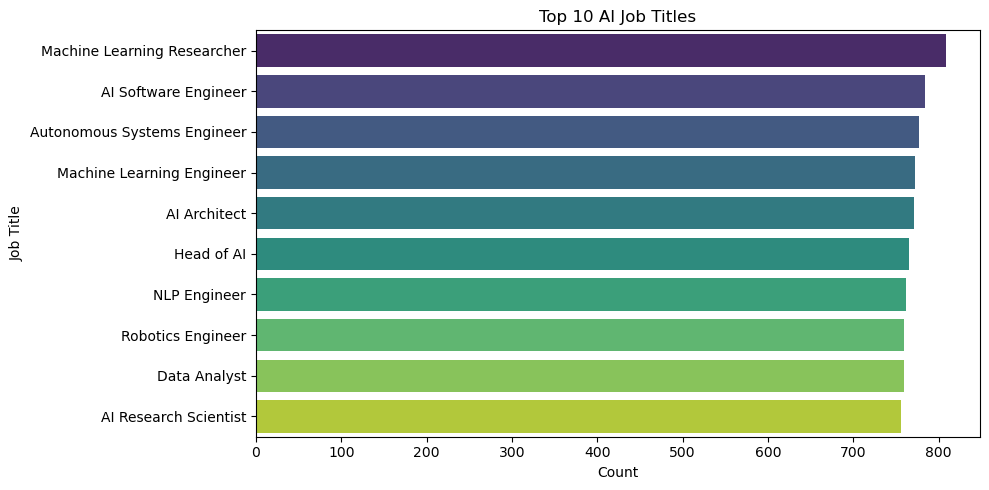

In [11]:
# 1. Top Job Titles
top_titles = df['job_title'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_titles.index, x=top_titles.values, palette='viridis')
plt.title('Top 10 AI Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

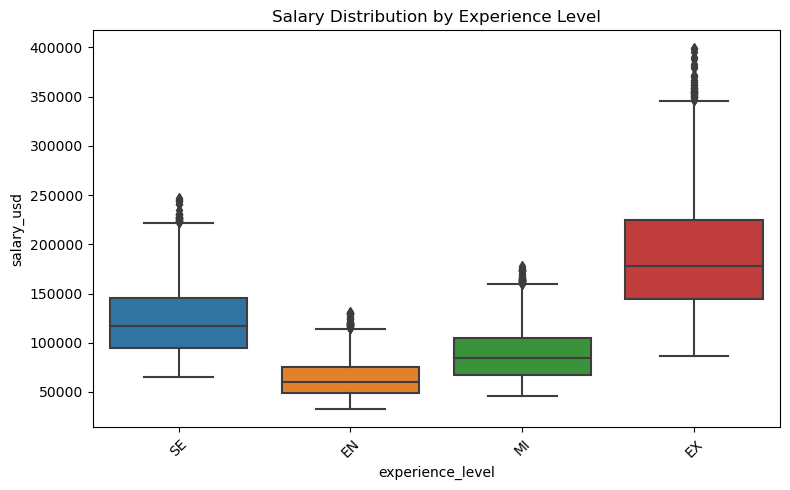

In [13]:
# 2. Salary Distribution by Experience Level
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='experience_level', y='salary_usd')
plt.title('Salary Distribution by Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

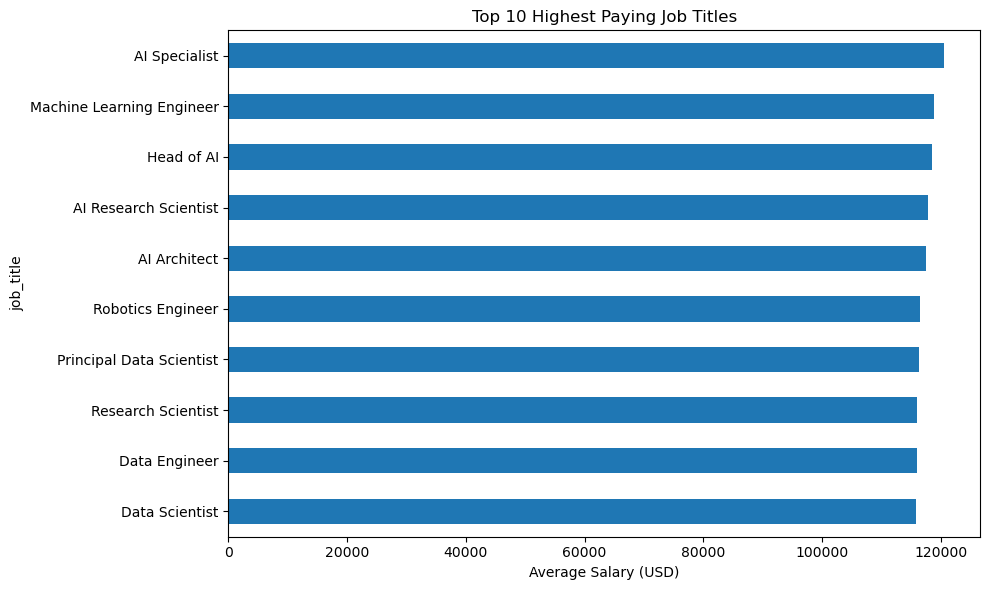

In [14]:
# 3. Average Salary by Job Title
avg_salary = df.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False).head(10)
avg_salary.plot(kind='barh', figsize=(10,6), title='Top 10 Highest Paying Job Titles')
plt.xlabel('Average Salary (USD)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

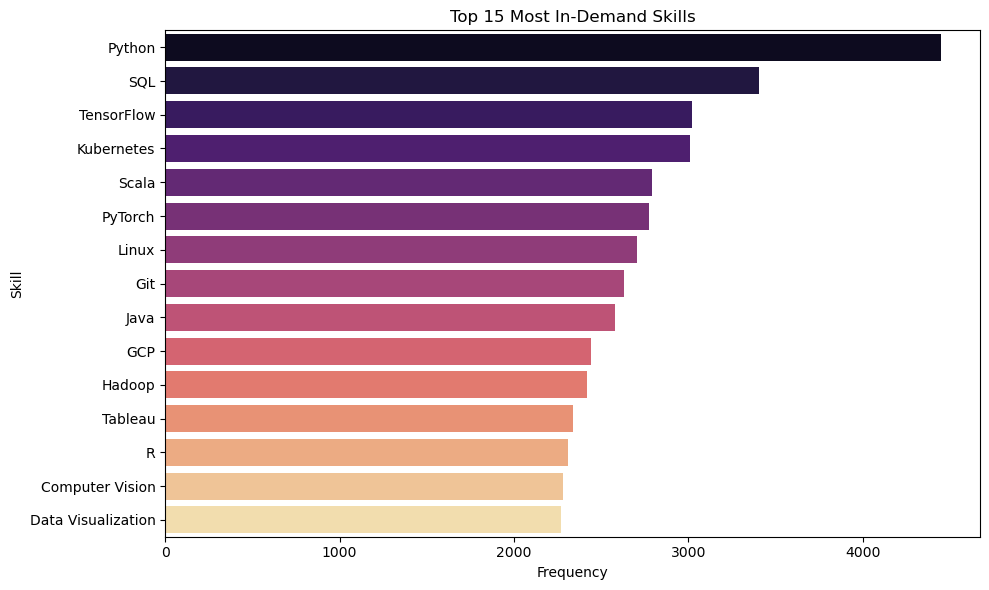

In [18]:
# 4. Most Frequent Skills
if 'required_skills' in df.columns:
    from collections import Counter
    skill_series = df['required_skills'].str.split(',').explode().str.strip()
    skill_counts = Counter(skill_series)
    top_skills = pd.Series(skill_counts).sort_values(ascending=False).head(15)

    plt.figure(figsize=(10,6))
    sns.barplot(y=top_skills.index, x=top_skills.values, palette='magma')
    plt.title('Top 15 Most In-Demand Skills')
    plt.xlabel('Frequency')
    plt.ylabel('Skill')
    plt.tight_layout()
    plt.show()

In [19]:
# Export Cleaned Data for Tableau
df.to_csv('cleaned_ai_job_dataset.csv', index=False)
print("Cleaned dataset saved to 'cleaned_ai_job_dataset.csv'")

Cleaned dataset saved to 'cleaned_ai_job_dataset.csv'
